In [9]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [10]:
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)


Saving binary.csv to binary (2).csv


In [11]:
# Convert rank to categorical and standardize numerical features
df['rank'] = df['rank'].astype('category')
scaler = StandardScaler()
df[['gre', 'gpa']] = scaler.fit_transform(df[['gre', 'gpa']])

# Create dummy variables for rank
X = pd.get_dummies(df[['gre', 'gpa', 'rank']], columns=['rank'], drop_first=True)
y = df['admit']

In [12]:
# Apply PCA to standardized features
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X)

# Create DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['admit'] = y.values


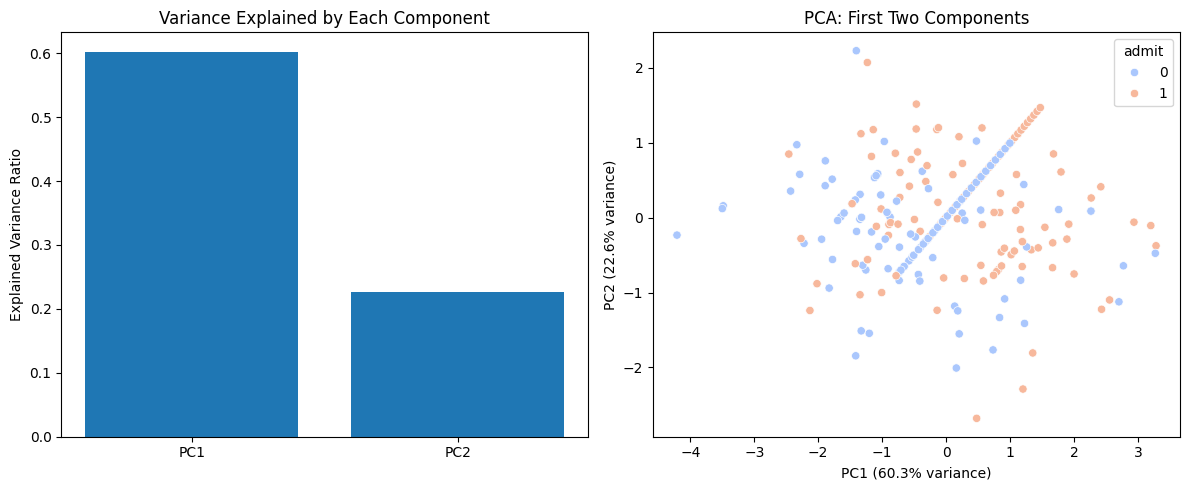

In [13]:
plt.figure(figsize=(12, 5))

# Plot explained variance
plt.subplot(1, 2, 1)
plt.bar(['PC1', 'PC2'], pca.explained_variance_ratio_)
plt.title('Variance Explained by Each Component')
plt.ylabel('Explained Variance Ratio')

# Plot PCA components
plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='admit', data=pca_df, palette='coolwarm')
plt.title('PCA: First Two Components')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')

plt.tight_layout()
plt.show()

In [14]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42)

model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train_pca)


LogisticRegression()

In [15]:
y_pred_pca = model_pca.predict(X_test_pca)

print("\n=== MODEL WITH PCA ===")
print("Confusion Matrix:\n", confusion_matrix(y_test_pca, y_pred_pca))
print("\nClassification Report:\n", classification_report(y_test_pca, y_pred_pca))
print(f"Accuracy: {accuracy_score(y_test_pca, y_pred_pca):.2f}")


=== MODEL WITH PCA ===
Confusion Matrix:
 [[12 18]
 [ 3 18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.40      0.53        30
           1       0.50      0.86      0.63        21

    accuracy                           0.59        51
   macro avg       0.65      0.63      0.58        51
weighted avg       0.68      0.59      0.57        51

Accuracy: 0.59


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred = model.predict(X_test)

print("\n=== MODEL WITHOUT PCA ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")



=== MODEL WITHOUT PCA ===
Confusion Matrix:
 [[13 17]
 [ 2 19]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.43      0.58        30
           1       0.53      0.90      0.67        21

    accuracy                           0.63        51
   macro avg       0.70      0.67      0.62        51
weighted avg       0.73      0.63      0.61        51

Accuracy: 0.63


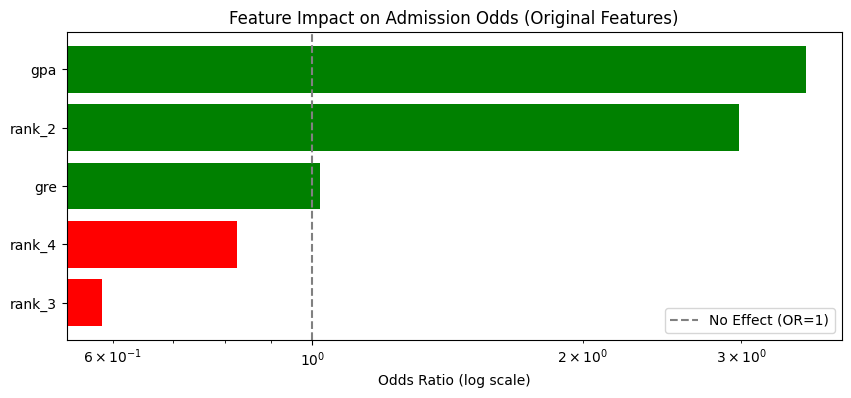

In [18]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Odds Ratio': np.exp(model.coef_[0])
}).sort_values('Odds Ratio', ascending=True)

plt.figure(figsize=(10, 4))
colors = ['green' if x > 1 else 'red' for x in coef_df['Odds Ratio']]
plt.barh(coef_df['Feature'], coef_df['Odds Ratio'], color=colors)
plt.axvline(x=1, color='gray', linestyle='--', label='No Effect (OR=1)')
plt.xlabel('Odds Ratio (log scale)')
plt.xscale('log')
plt.title('Feature Impact on Admission Odds (Original Features)')
plt.legend()
plt.show()

In [19]:
results = pd.DataFrame({
    'Model': ['With PCA (2 components)', 'Without PCA'],
    'Accuracy': [
        accuracy_score(y_test_pca, y_pred_pca),
        accuracy_score(y_test, y_pred)
    ],
    'Features Used': [2, X.shape[1]]
})

print("\n=== FINAL COMPARISON ===")
print(results)


=== FINAL COMPARISON ===
                     Model  Accuracy  Features Used
0  With PCA (2 components)  0.588235              2
1              Without PCA  0.627451              5
